In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [2]:
#top50
result1 =requests.get("https://www.imdb.com/search/title/?genres=Adventure&explore=title_type,genres&ref_=tt_ov_inf")
source1= result1.content
doc1= BeautifulSoup(source1, 'lxml')

In [3]:
films=[]
filmdoc=doc1.find_all('h3',attrs={'class':'lister-item-header'})
for film in filmdoc:
    name= film.find('a')
    films.append(name.text.replace('\n', ''))

In [4]:
genre=[]
genremovie=doc1.find_all('span',attrs={'class':'genre'})
for i in genremovie:
    genre.append(i.text.replace('\n', ''))

In [5]:
run_times=[]
run_time=doc1.findAll('span',class_='runtime')
for i in run_time:
        run_times.append(i.text.replace('\n', ''))
    
if len(run_time)<49:
    for j in range(49-len(run_time)+1):
        run_times.append(np.nan)
            

In [6]:
annee=[]
annee_sortie=doc1.findAll('span', class_='lister-item-year text-muted unbold')
for i in annee_sortie:
    annee.append(i.text.replace('\n', ''))          

In [7]:
metascore=[]
metascoresdiv=doc1.findAll('div', class_='inline-block ratings-metascore')
for meta in metascoresdiv:
    metas= meta.find('span',class_='metascore favorable')
    if metas:
        metascore.append(metas.text.replace('\n', ''))
    else: 
        metascore.append(np.nan)
        
if len(metascore)<49:
    for j in range(49-len(metascore)+1):
        metascore.append(np.nan)
            

In [8]:
vote=[]
votesfilm=doc1.find_all('p',class_='sort-num_votes-visible')
for i in votesfilm:
    vote.append(i.text.replace('\n', ''))

if len(vote)<49:
    for j in range(49-len(vote)+1):
        vote.append(np.nan)

In [9]:
IMDB=[]
IMDb_ratings=doc1.findAll('div', class_='inline-block ratings-imdb-rating')
for i in IMDb_ratings:
    IMDB.append(i.text.replace('\n', ''))
    
if len(IMDB)<49:
    for j in range(49-len(IMDB)+1):
        IMDB.append(np.nan)

In [10]:
a=list(zip(films,genre,annee,run_times,metascore,vote,IMDB))
df=pd.DataFrame(a,columns=['films','genre','annee','run_times','metascore','vote','IMDB'])
df

,films,genre,annee,run_times,metascore,vote,IMDB
0,Black Panther: Wakanda Forever,"Action, Adventure, Drama",(2022),161 min,67,"Votes:88,711",7.3
1,Andor,"Action, Adventure, Drama",(2022– ),40 min,NaN,"Votes:63,163",8.4
2,Black Adam,"Action, Adventure, Fantasy",(2022),125 min,NaN,"Votes:130,703",6.8
3,Disenchanted,"Animation, Adventure, Comedy",(2022),119 min,64,"Votes:8,293",5.9
4,House of the Dragon,"Action, Adventure, Drama",(2022– ),57 min,88,"Votes:261,326",8.5
5,Game of Thrones,"Action, Adventure, Drama",(2011–2019),129 min,NaN,"Votes:2,085,144",9.2
6,Enola Holmes 2,"Action, Adventure, Crime",(2022),134 min,68,"Votes:48,451",6.8
7,Black Panther,"Action, Adventure, Sci-Fi",(2018),117 min,75,"Votes:763,661| Gross:$700.06M",7.3
8,God of War: Ragnarök,"Action, Adventure, Drama",(2022 Video Game),123 min,81,"Votes:4,755",9.8
9,The Lord of the Rings: The Rings of Power,"Action, Adventure, Drama",(2022– ),45 min,NaN,"Votes:289,533",6.9


In [11]:
#load the html source directly from a website
result =requests.get("https://www.imdb.com/title/tt9114286/reviews?ref_=tt_ov_rt")

In [12]:
#extract the html source and initiate BeautifulSoup
source= result.content
doc= BeautifulSoup(source, 'lxml')
#print(doc)

In [13]:
new_url='https://www.imdb.com/title/tt9114286/reviews?ref_=tt_ov_rt'
result3= requests.get(new_url)
doc3= BeautifulSoup(result3.content, 'lxml')

In [14]:
ratings=[]
review_container= doc3.find_all('div',attrs={'class':'review-container'})
for review in review_container:
    rate = review.find('span',attrs={'class':'rating-other-user-rating'})
    if rate :
        ratings.append(rate.text.replace('\n',' '))
    else: 
        ratings.append(np.nan)

comments_title=[]
titre=doc3.findAll('a',attrs={'class':'title'})
for i in titre:
    comments_title.append(i.text.replace('\n', ''))
    
comments=[]
comment=doc3.findAll('div',attrs={'class':'text'})
for i in comment:
    comments.append(i.text.replace('\n', ''))   

ratings=pd.Series(ratings, name="ratings")
titlereviews= pd.Series(comments_title , name='comments_title') 
reviews= pd.Series(comments, name="reviews") 
    
feedback_df= pd.concat([titlereviews,reviews,ratings], axis=1)

# printing reviews in an organized way
feedback_df.insert(0, 'index', range(1, len(feedback_df) + 1))
feedback_df


,index,comments_title,reviews,ratings
0,1,Not what I expected...,I am conflicted with this film and with Marvel...,6/10
1,2,"Underwhelming, But OK",I just got out of Black PantherI found it pret...,6/10
2,3,I Yield,"First of all, RIP to Chadwick Boseman. They re...",6/10
3,4,I liked it a lot,Phase 4's MCU comes to a close with Black Pant...,8/10
4,5,"A Fantastic, Emotional, and Mature Marvel Film",Black Panther was a very welcome addition to t...,9/10
5,6,"Overall, weak","This film had some great stuff in it, there's ...",6/10
6,7,Bad editing ruined it; the stellar score and ...,This film and its prequel both had exceptional...,NaN
7,8,Pays an appropriately sombre tribute to its r...,"""Black Panther: Wakanda Forever"" is the sequel...",8/10
8,9,Overblown and Oversaturated Airplane Movie,"At this point, Marvel is getting too saturated...",6/10
9,10,A big challenge that Ryan Coogler overcame!,I want to start by saying I haven't been the b...,8/10


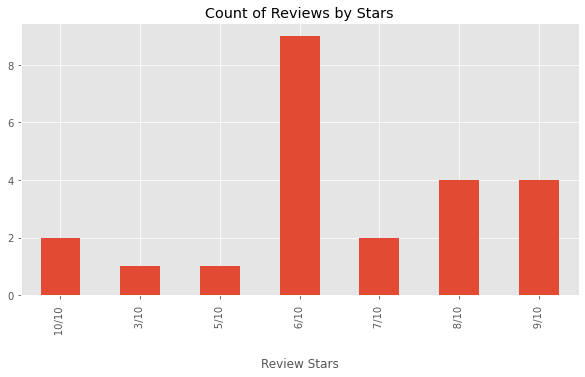

In [15]:
#calculating the reviews by stars
ax =ratings.value_counts().sort_index().plot(kind= 'bar',
          title= 'Count of Reviews by Stars',
          figsize=(10, 5) )
ax.set_xlabel('Review Stars')
plt.show()


In [16]:
# seperating the words from the comments
tokenslst=[]
for i in range(23):
    example = feedback_df['reviews'][i]
    tokens = nltk.word_tokenize(example)
    tokenslst.append(tokens)
    #print(tokenslst)

In [17]:
#this is just an example on one of the comments
sia.polarity_scores(example)

{'neg': 0.161, 'neu': 0.689, 'pos': 0.15, 'compound': 0.2575}

In [18]:
#processing data for a possible future ML algorithm 
res = {}
for i, row in tqdm(feedback_df.iterrows(), total=len(feedback_df)):
    text = row['reviews']
    res[i] = sia.polarity_scores(text)


  0%|          | 0/25 [00:00<?, ?it/s]

In [19]:
# merging the sentiment analysis with the rest of the data
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index()
vaders = vaders.merge(feedback_df, how='left')
#vaders

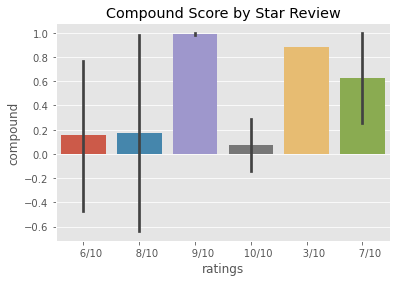

In [20]:
# plot vaders results
ax = sns.barplot(data=vaders, x='ratings', y='compound')
ax.set_title('Compound Score by Star Review')
plt.show()

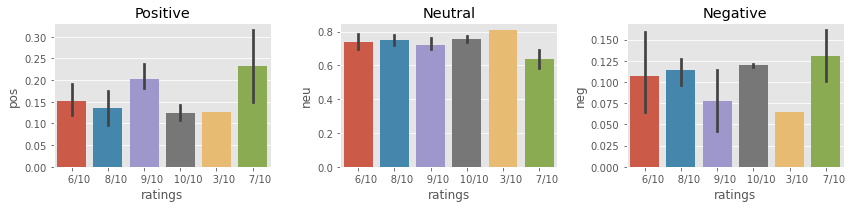

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='ratings', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='ratings', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='ratings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()